In [0]:
import tensorflow as tf

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [3]:
!wget https://raw.githubusercontent.com/lazyprogrammer/machine_learning_examples/master/tf2.0/moore.csv

--2020-04-02 11:09:50--  https://raw.githubusercontent.com/lazyprogrammer/machine_learning_examples/master/tf2.0/moore.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2302 (2.2K) [text/plain]
Saving to: ‘moore.csv’

moore.csv           100%[===================>]   2.25K  --.-KB/s    in 0s      

2020-04-02 11:09:50 (60.8 MB/s) - ‘moore.csv’ saved [2302/2302]



In [0]:
data = pd.read_csv('moore.csv', header=None).values
x = data[:,0].reshape(-1,1)
y = data[:,1]

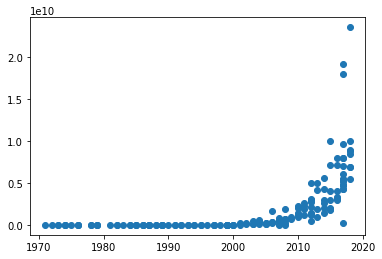

In [5]:
plt.scatter(x,y)

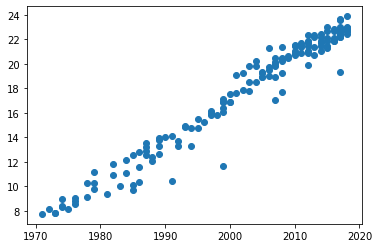

In [6]:
y = np.log(y)
plt.scatter(x,y)

In [0]:
x= x-x.mean()

In [9]:
model = tf.keras.models.Sequential([
                                    tf.keras.layers.Input(shape=(1,)),
                                    tf.keras.layers.Dense(1)
])


model.compile(optimizer=tf.keras.optimizers.SGD(0.001,0.9),loss = 'mse')

def schedule(epoch, lr):
  if epoch >= 50:
    return 0.0001
  return 0.001

scheduler = tf.keras.callbacks.LearningRateScheduler(schedule)

r = model.fit(x,y, epochs = 200, callbacks =[scheduler])

ERROR! Session/line number was not unique in database. History logging moved to new session 60
Epoch 1/200
6/6 [==============================] - 0s 2ms/step - loss: 604.6198 - lr: 0.0010
Epoch 2/200
6/6 [==============================] - 0s 2ms/step - loss: 406.3029 - lr: 0.0010
Epoch 3/200
6/6 [==============================] - 0s 1ms/step - loss: 509.4133 - lr: 0.0010
Epoch 4/200
6/6 [==============================] - 0s 1ms/step - loss: 450.1973 - lr: 0.0010
Epoch 5/200
6/6 [==============================] - 0s 2ms/step - loss: 587.9566 - lr: 0.0010
Epoch 6/200
6/6 [==============================] - 0s 2ms/step - loss: 265.6785 - lr: 0.0010
Epoch 7/200
6/6 [==============================] - 0s 1ms/step - loss: 159.1674 - lr: 0.0010
Epoch 8/200
6/6 [==============================] - 0s 1ms/step - loss: 84.5762 - lr: 0.0010
Epoch 9/200
6/6 [==============================] - 0s 1ms/step - loss: 82.3096 - lr: 0.0010
Epoch 10/200
6/6 [==============================] - 0s 1ms/step - loss

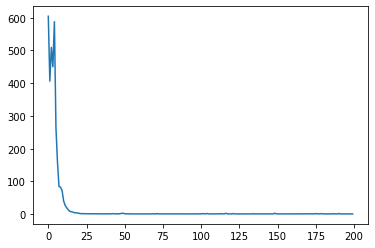

In [10]:
plt.plot(r.history['loss'], label ='loss')

In [11]:
print(model.layers)
print(model.layers[0].get_weights())

[array([[0.33960158]], dtype=float32), array([17.743841], dtype=float32)]


In [14]:
a = model.layers[0].get_weights()[0][0,0]
print(a)

0.33960158


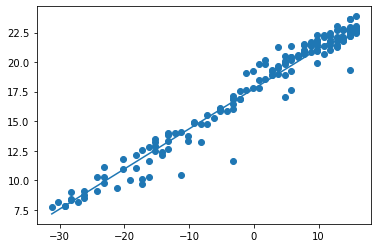

In [15]:
yhat = model.predict(x).flatten()
plt.scatter(x,y)
plt.plot(x,yhat)